In [150]:
! pip install pandas
!pip install numpy
!pip install scikit-survival
!pip install tqdm

In [116]:
import pandas as pd
hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")
consommant=pd.read_csv("consommant_anonyme.csv")
patient=pd.read_csv("patient_anonyme.csv")

/tmp/ipykernel_378/1509498775.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
/tmp/ipykernel_378/1509498775.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")


In [117]:
hospit_non_chr

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,CHOC,HEMOD,CHIMIO,BEN_NIR_IDT_ENC
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,0,0,0,NNNrldvdxovvnRkh`
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,0,0,0,NNNrldvdxovvnRkh`
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,0,0,0,NNNrldvdxovvnRkh`
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,0,0,0,NNNrldvdxovvnRkh`
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,0,0,0,NNNrldvdxovvnRkh`
...,...,...,...,...,...,...,...,...,...,...,...
93359,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,0,0,0,~rpqp}\p_ann
93360,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE
93361,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,0,0,0,]]\X[MNUZ\VZSZUIE
93362,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE


In [118]:
patient

,date_h0,ALD_before,pop,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT_ENC
0,2011-11-22,0,1,1949,11,1,NaN,NNNrldvdxovvnRkh`
1,2013-12-05,0,1,1929,14,2,2015-03,OOTXwtbmlQwtiiega
2,2015-07-02,0,1,1967,54,2,2015-08,aaga{|vsa{vycs
3,2011-05-19,0,1,1959,974,1,NaN,SSggg[sqizWwVTume
4,2010-03-18,0,1,1947,76,1,NaN,<<V>CeVT_DEEAa_WN
...,...,...,...,...,...,...,...,...
9978,2014-02-08,0,1,1920,29,1,2014-12,vd`u `uac|{sp
9979,2012-02-09,0,1,1927,61,1,2017-05,{{ierfkSTfnuhcgTc
9980,2010-07-27,0,1,1924,999,1,2010-08,rrhjmlJcqZ__keNjZ
9981,2011-11-25,0,1,1925,13,2,2013-03,~rpqp}\p_ann


In [119]:
patient["date_h0"]=pd.to_datetime(patient["date_h0"])
patient["dte_deces"]=pd.to_datetime(patient["dte_deces"])

In [120]:
patient["Nb_survie"]=patient["dte_deces"]-patient["date_h0"]
patient["Mort"]= [x.days>0 for x in patient["Nb_survie"]]
#patient=patient.drop(columns=["Survie"])

In [121]:
patient["Nb_survie"]=patient["Nb_survie"].fillna(pd.Timedelta(3500, "d"))

In [122]:
patient

,date_h0,ALD_before,pop,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT_ENC,Nb_survie,Mort
0,2011-11-22,0,1,1949,11,1,NaT,NNNrldvdxovvnRkh`,3500 days,False
1,2013-12-05,0,1,1929,14,2,2015-03-01,OOTXwtbmlQwtiiega,451 days,True
2,2015-07-02,0,1,1967,54,2,2015-08-01,aaga{|vsa{vycs,30 days,True
3,2011-05-19,0,1,1959,974,1,NaT,SSggg[sqizWwVTume,3500 days,False
4,2010-03-18,0,1,1947,76,1,NaT,<<V>CeVT_DEEAa_WN,3500 days,False
...,...,...,...,...,...,...,...,...,...,...
9978,2014-02-08,0,1,1920,29,1,2014-12-01,vd`u `uac|{sp,296 days,True
9979,2012-02-09,0,1,1927,61,1,2017-05-01,{{ierfkSTfnuhcgTc,1908 days,True
9980,2010-07-27,0,1,1924,999,1,2010-08-01,rrhjmlJcqZ__keNjZ,5 days,True
9981,2011-11-25,0,1,1925,13,2,2013-03-01,~rpqp}\p_ann,462 days,True


Text(0.5, 0, 'time $t$')

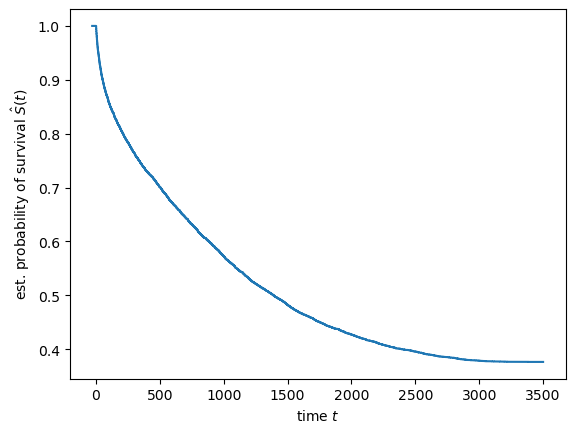

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(patient["Mort"], patient["Nb_survie"])
days=time.astype('timedelta64[D]')
days/np.timedelta64(1,'D')
plt.step(days, survival_prob, where="post")
plt.ylabel("Probabilité de survie $\hat{S}(t)$")
plt.xlabel("Temps en jours $t$")

In [125]:
patient

NameError: name 'patient_non_chr' is not defined

In [133]:
hospit_full_hospit

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,CHOC,HEMOD,CHIMIO,BEN_NIR_IDT_ENC
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,0,0,0,NNNrldvdxovvnRkh`
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,0,0,0,NNNrldvdxovvnRkh`
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,0,0,0,NNNrldvdxovvnRkh`
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,0,0,0,NNNrldvdxovvnRkh`
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,0,0,0,NNNrldvdxovvnRkh`
...,...,...,...,...,...,...,...,...,...,...,...
156149,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,0,0,0,~rpqp}\p_ann
156150,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE
156151,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,0,0,0,]]\X[MNUZ\VZSZUIE
156152,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE


In [176]:
from tqdm import tqdm

patient_mort=patient.loc[patient["Mort"]]
hospit_mort = []
hospit_nb_survie=[]
code_patient_mort=np.array(patient_mort.CODE_PATIENT_ENC)
for i in tqdm(range(len(hospit_full_hospit.BEN_NIR_IDT_ENC))):
    x=hospit_full_hospit.BEN_NIR_IDT_ENC.iloc[i]
    hospit_nb_survie.append(patient[patient["CODE_PATIENT_ENC"]==x]["Nb_survie"].iloc[0])
    if x in code_patient_mort:
        hospit_mort.append(True)
    else:
        hospit_mort.append(False)
hospit_full_hospit["Mort"]=hospit_mort
hospit_full_hospit["Nb_survie"]=hospit_nb_survie

100%|██████████| 156154/156154 [10:53<00:00, 238.87it/s]


In [177]:
hospit_full_hospit

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,CHOC,HEMOD,CHIMIO,BEN_NIR_IDT_ENC,Mort,Nb_survie
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,0,0,0,NNNrldvdxovvnRkh`,False,3500 days
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,0,0,0,NNNrldvdxovvnRkh`,False,3500 days
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,0,0,0,NNNrldvdxovvnRkh`,False,3500 days
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,0,0,0,NNNrldvdxovvnRkh`,False,3500 days
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,0,0,0,NNNrldvdxovvnRkh`,False,3500 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156149,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,0,0,0,~rpqp}\p_ann,True,462 days
156150,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE,False,3500 days
156151,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,0,0,0,]]\X[MNUZ\VZSZUIE,False,3500 days
156152,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,0,0,0,]]\X[MNUZ\VZSZUIE,False,3500 days


In [178]:
patient["Mort"].sum()

5704

In [179]:
hospit_full_hospit["Mort"].sum()

95291

In [180]:
hospit_nb_survie[0]

Timedelta('3500 days 00:00:00')

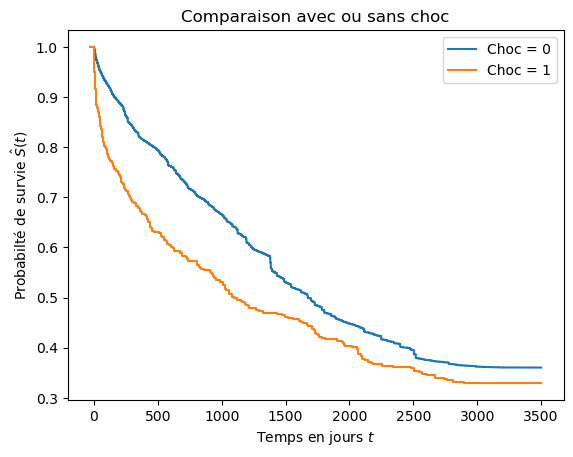

In [184]:
for treatment_type in (0, 1):
    mask_treat = hospit_full_hospit["CHOC"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        hospit_full_hospit["Mort"][mask_treat],
        hospit_full_hospit["Nb_survie"][mask_treat])
    days=time_treatment.astype('timedelta64[D]')
    days/np.timedelta64(1,'D')
    plt.step(days, survival_prob_treatment, where="post",
             label="Choc = %s" % treatment_type)

plt.ylabel("Probabilté de survie $\hat{S}(t)$")
plt.xlabel("Temps en jours $t$")
plt.title("Comparaison avec ou sans choc")
plt.legend(loc="best")

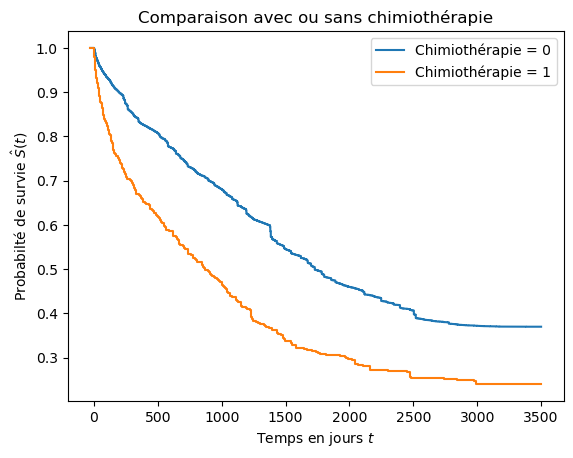

In [186]:
for treatment_type in (0, 1):
    mask_treat = hospit_full_hospit["CHIMIO"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        hospit_full_hospit["Mort"][mask_treat],
        hospit_full_hospit["Nb_survie"][mask_treat])
    days=time_treatment.astype('timedelta64[D]')
    days/np.timedelta64(1,'D')
    plt.step(days, survival_prob_treatment, where="post",
             label="Chimiothérapie = %s" % treatment_type)

plt.ylabel("Probabilté de survie $\hat{S}(t)$")
plt.xlabel("Temps en jours $t$")
plt.title("Comparaison avec ou sans chimiothérapie")
plt.legend(loc="best")

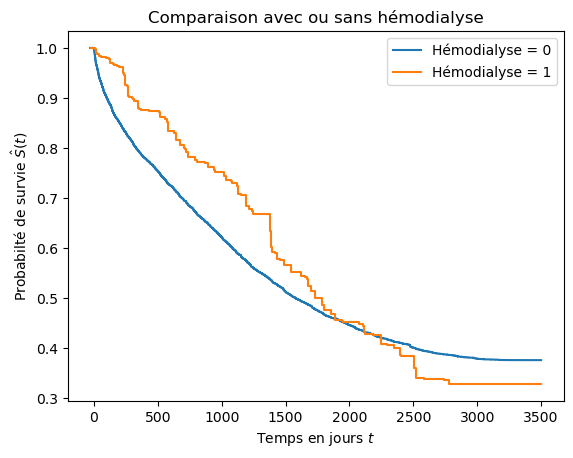

In [187]:
for treatment_type in (0, 1):
    mask_treat = hospit_full_hospit["HEMOD"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        hospit_full_hospit["Mort"][mask_treat],
        hospit_full_hospit["Nb_survie"][mask_treat])
    days=time_treatment.astype('timedelta64[D]')
    days/np.timedelta64(1,'D')
    plt.step(days, survival_prob_treatment, where="post",
             label="Hémodialyse = %s" % treatment_type)

plt.ylabel("Probabilté de survie $\hat{S}(t)$")
plt.xlabel("Temps en jours $t$")
plt.title("Comparaison avec ou sans hémodialyse")
plt.legend(loc="best")

In [194]:
# for treatment_type in (range(0,50,10)):
#     mask_treat =hospit_full_hospit["SEJ_NBJ"] <= treatment_type and hospit_full_hospit["SEJ_NBJ"]> treatment_type-10
#     time_treatment, survival_prob_treatment = kaplan_meier_estimator(
#         hospit_full_hospit["Mort"][mask_treat],
#         hospit_full_hospit["Nb_survie"][mask_treat])
#     days=time_treatment.astype('timedelta64[D]')
#     days/np.timedelta64(1,'D')
#     plt.step(days, survival_prob_treatment, where="post",
#              label="Durée de séjours à l'hopital <= %s" % treatment_type)

# plt.ylabel("Probabilté de survie $\hat{S}(t)$")
# plt.xlabel("Temps en jours $t$")
# plt.title("Comparaison avec la durée de séjour")
# plt.legend(loc="best")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().